# Problem Statement

The objective of this project is to **predict the sale price of residential homes** in Ames, Iowa, using features such as the number of rooms, house condition, neighborhood, and year built. By building a predictive model, the goal is to estimate the sale price based on available property characteristics to assist in more accurate property evaluations for real estate decisions.


In [79]:

# -------------------------------
# Data manipulation & analysis
# -------------------------------
import numpy as np
import pandas as pd

# -------------------------------
# Visualization libraries
# -------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Machine learning and model building
# -------------------------------
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# -------------------------------
# Model evaluation
# -------------------------------
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# Suppress warnings
# -------------------------------
import warnings
warnings.filterwarnings('ignore')


In [80]:

#import dataset
ames=pd.read_csv('../data/AmesHousing.csv')


In [81]:

ames.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [82]:

ames.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [83]:
#copying ames dataset to df for data cleaning!
df = ames.copy()

# Drop columns with too many missing values (>80%)
missing_ratio = df.isnull().mean()
columns_to_drop = missing_ratio[missing_ratio > 0.8].index
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Missing numerical columns filled with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Missing categorical columns filled with 'Missing'
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna('Missing', inplace=True)

# Checks after data cleaning
print("Missing values after cleaning:\n", df.isnull().sum().sort_values(ascending=False).head())

# dropping identifiers
df.drop(['Order', 'PID'], axis=1, inplace=True)

# checking shape 
print("Cleaned dataset shape:", df.shape)


Missing values after cleaning:
 Order            0
Full Bath        0
Fireplaces       0
Functional       0
TotRms AbvGrd    0
dtype: int64
Cleaned dataset shape: (2930, 76)


In [84]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2930 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Lot Shape        2930 non-null   object 
 6   Land Contour     2930 non-null   object 
 7   Utilities        2930 non-null   object 
 8   Lot Config       2930 non-null   object 
 9   Land Slope       2930 non-null   object 
 10  Neighborhood     2930 non-null   object 
 11  Condition 1      2930 non-null   object 
 12  Condition 2      2930 non-null   object 
 13  Bldg Type        2930 non-null   object 
 14  House Style      2930 non-null   object 
 15  Overall Qual     2930 non-null   int64  
 16  Overall Cond     2930 non-null   int64  
 17  Year Built    

In [85]:
#Exploratory Data Analysis

Text(0.5, 1.0, 'SalePrice Distribution')

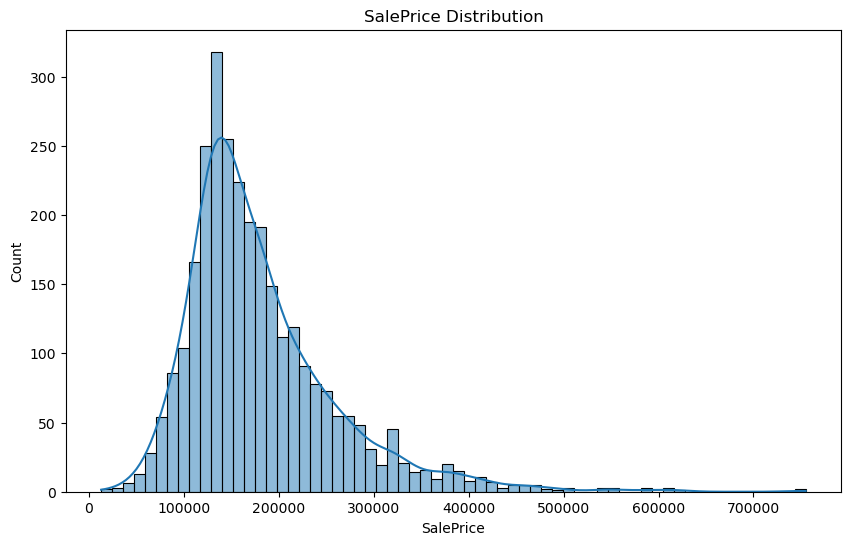

In [98]:

#1. Univariate Analysis
# Distribution of saleprice
plt.figure(figsize=(10, 6))
df['SalePrice'].describe()
sns.histplot(df['SalePrice'], kde=True)
plt.title("SalePrice Distribution")


In [87]:
#2. Bivariate Analysis

Text(0.5, 1.0, 'Gr Liv Area Sales Price')

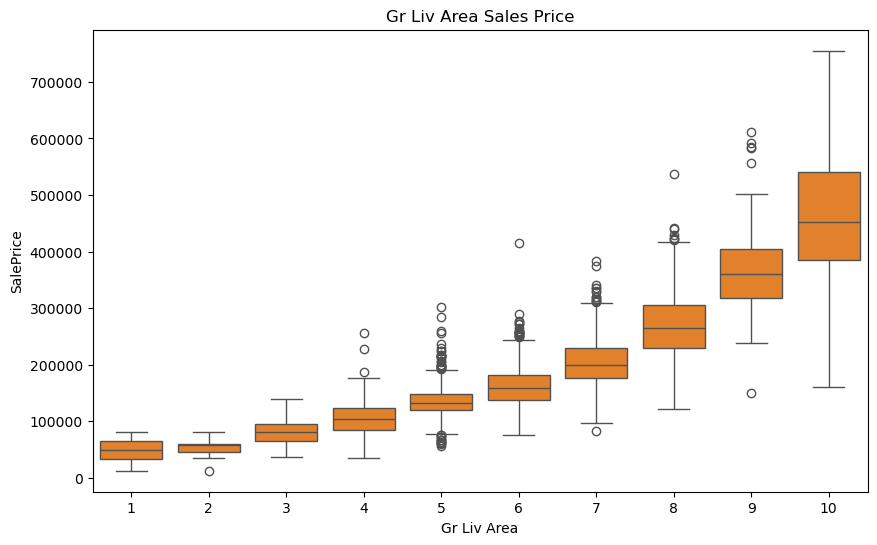

In [99]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)
sns.boxplot(x='Overall Qual', y='SalePrice', data=df)
plt.title("Gr Liv Area Sales Price")


In [89]:
#correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

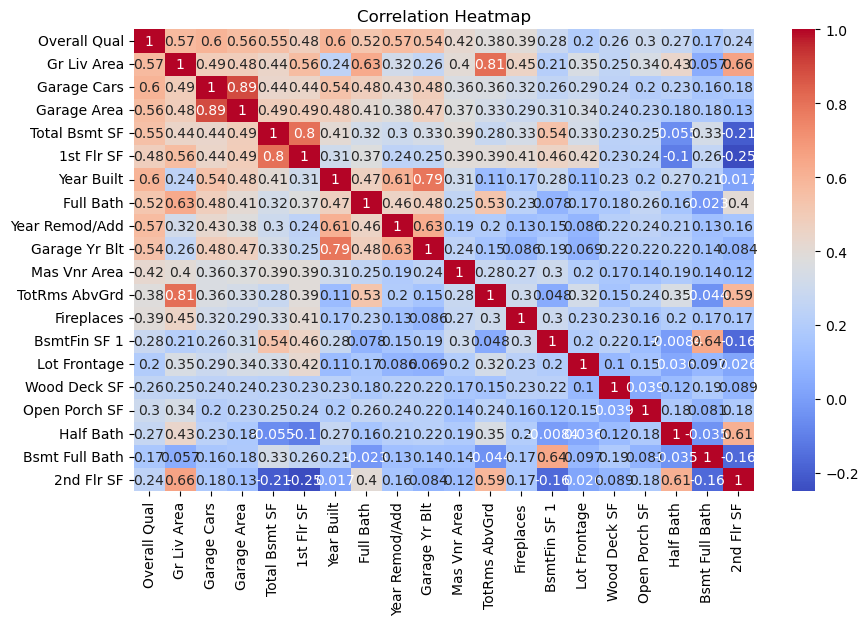

In [100]:

plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
top_corr = corr['SalePrice'].abs().sort_values(ascending=False)[1:21]
sns.heatmap(df[top_corr.index].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")


Text(0.5, 1.0, 'Outlier Detection')

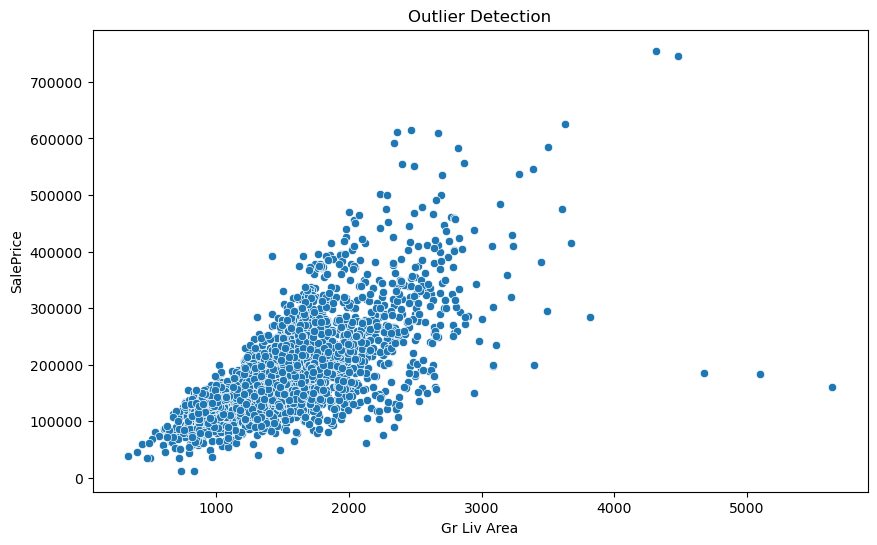

In [101]:

#outlier detection
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)
plt.title("Outlier Detection")


Text(0.5, 1.0, 'Neighborhood Saleprice')

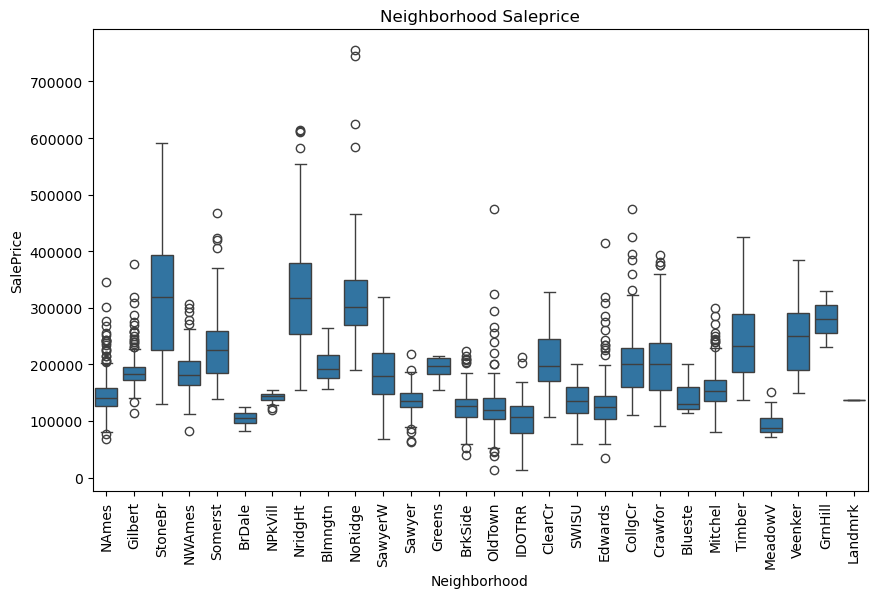

In [102]:

#5. Categorical Feature Impact
plt.figure(figsize=(10, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.title("Neighborhood Saleprice")


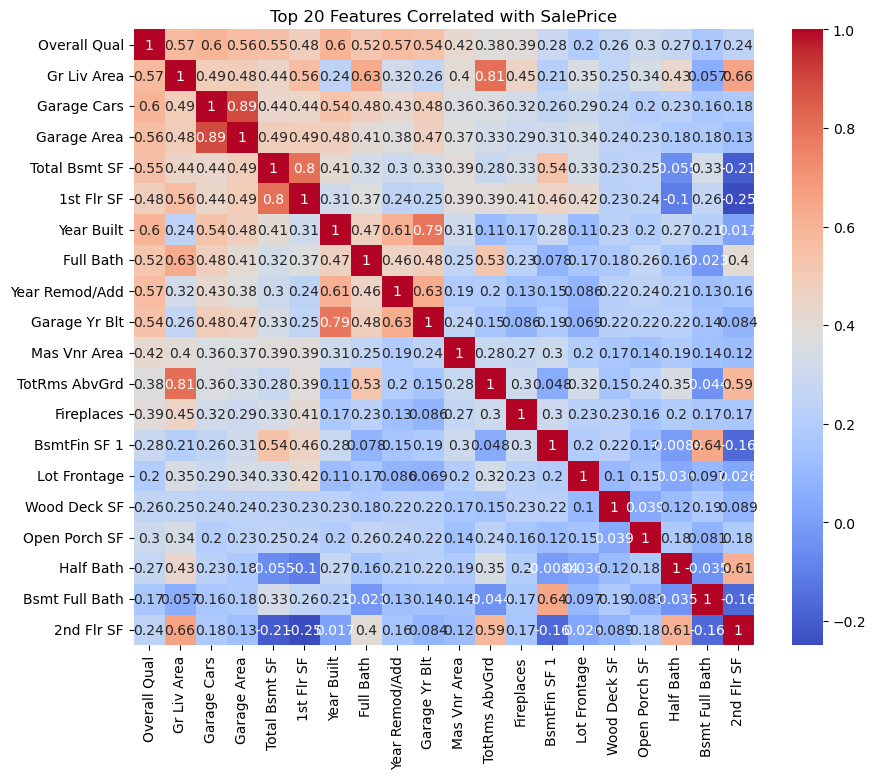

In [93]:

#Top 20 Features Correlated with SalePrice
corr = df.corr(numeric_only=True)
top_corr_features = corr['SalePrice'].sort_values(ascending=False)[1:21]

plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr_features.index].corr(), annot=True, cmap='coolwarm')
plt.title("Top 20 Features Correlated with SalePrice")
plt.show()


In [94]:
# Import necessary libraries


# Split the data into features and target variable
X = ames.drop(columns=['SalePrice'])  # Features
y = ames['SalePrice']  # Target variable

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical features (impute missing values)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Preprocessing for categorical features (impute missing values, then encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = LinearRegression()

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Root Mean Squared Error (RMSE): 29525.568696977974
R² Score: 0.8912686005256892


In [95]:
#Check for Overfitting

y_train_pred = pipeline.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {r2:.4f}")


Train R² Score: 0.9394
Test R² Score: 0.8913


In [96]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ridge Regression
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])
ridge_pipeline.fit(X_train, y_train)
ridge_preds = ridge_pipeline.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))  
ridge_r2 = r2_score(y_test, ridge_preds)

print(f"Ridge RMSE: {ridge_rmse:.2f}")
print(f"Ridge R²: {ridge_r2:.4f}")

# Lasso Regression
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1, max_iter=10000))
])
lasso_pipeline.fit(X_train, y_train)
lasso_preds = lasso_pipeline.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_preds)) 
lasso_r2 = r2_score(y_test, lasso_preds)

print(f"Lasso RMSE: {lasso_rmse:.2f}")
print(f"Lasso R²: {lasso_r2:.4f}")


Ridge RMSE: 28909.72
Ridge R²: 0.8958
Lasso RMSE: 29230.17
Lasso R²: 0.8934


| Model                | RMSE          | R² Score   |
| -------------------- | ------------- | ---------- |
| Linear Regression    | 29,525.57     | 0.8913     |
| **Ridge Regression** | **28,909.72** | **0.8958** |
| Lasso Regression     | 29,230.17     | 0.8934     |



 Top 5 Most Accurate Predictions:
      Actual      Predicted       Error
1058  390000  389873.613433  126.386567
2110  175900  176045.304873  145.304873
2071  302000  302160.607772  160.607772
567   173733  173897.315027  164.315027
135   154300  154076.245225  223.754775

 Bottom 5 Predictions:
      Actual      Predicted          Error
432   610000  478417.091676  131582.908324
2445  625000  471948.893163  153051.106837
433   582933  418201.828029  164731.171971
44    611657  436617.859078  175039.140922
2181  184750  560128.147807  375378.147807


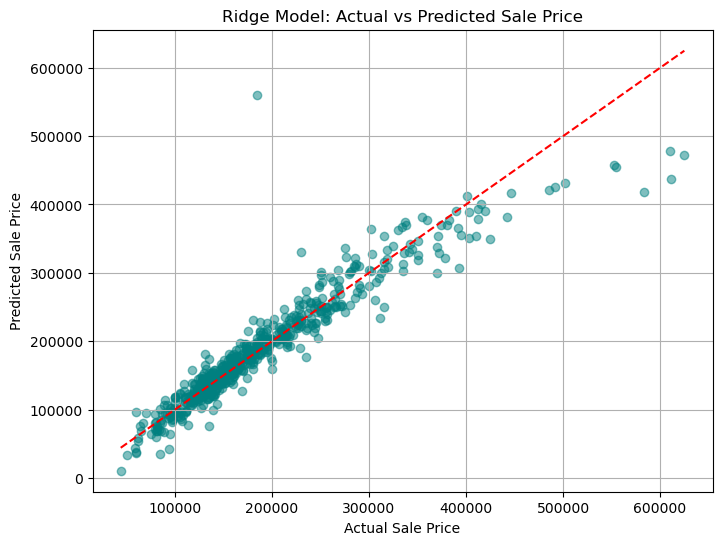

In [97]:

# Prediction using the best model (Ridge)
ridge_preds = ridge_pipeline.predict(X_test)

# DataFrame for actual vs predicted
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': ridge_preds,
    'Error': np.abs(y_test - ridge_preds)
})

# Sort by prediction error
sorted_results = results_df.sort_values(by='Error')

# Top 5 Best Predictions
print("\n Top 5 Most Accurate Predictions:")
print(sorted_results.head())

# Top 5 Worst Predictions
print("\n Bottom 5 Predictions:")
print(sorted_results.tail())

# Plots actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Ridge Model: Actual vs Predicted Sale Price')
plt.grid(True)
plt.show()


### **Summary of Prediction Accuracy for Ridge Model**

#### **Top 5 Most Accurate Predictions**:
The Ridge model demonstrated exceptional accuracy for the following five properties, exhibiting minimal discrepancies between actual and predicted sale prices:

- **Minimum Prediction Error:** $\$$126.39 for a property with an actual price of $\$$390,000.
- The **highest prediction error** within this top 5 was $\$$223.75 for a property valued at $\$$154,300.

These results indicate the model's strong predictive capability for mid-range to lower-priced homes, suggesting its reliability within this price segment.

#### **Top 5 Worst Predictions**:
Conversely, the model exhibited significant deviations between actual and predicted sale prices for these five properties, highlighting areas of weakness:

- The **largest prediction error** was a substantial $\$$375,378 for a property with an actual price of $\$$184,750.
- The **highest prediction error** among high-value homes was $\$$175,039 for a property priced at $\$$611,657.

These considerable errors suggest potential limitations of the model when dealing with high-end properties and the outliers within the dataset, possibly due to the intricacies involved in predicting extreme values.


### **Conclusion**:
- The **Ridge model** proves to be highly effective in predicting the sale prices of **mid-range properties**, as evidenced by the minimal errors in the most accurate predictions.
- However, the model encounters significant challenges when predicting the prices of **high-value homes** and properties that deviate significantly from the central tendency of the dataset. This underscores the need for potential enhancements to better capture extreme values or the exploration of more sophisticated models for outlier prediction.